In [45]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
import warnings
warnings.filterwarnings("ignore")

In [46]:
old_df = pd.read_csv('old_park.csv')
new_df = pd.read_csv('new_park.csv')

In [47]:
old_gf = gpd.read_file('2014.geojson')
new_gf = gpd.read_file('NEW.geojson')

In [48]:
old_gf.columns

Index(['shape_area', 'system', 'landuse', 'shape_leng', 'parknum', 'park_name',
       'feat_code', 'status', 'sub_code', 'source_id', 'geometry'],
      dtype='object')

In [49]:
new_gf.columns

Index(['us_congres', 'mapped', 'global_id', 'zipcode', 'acres', 'location',
       'typecatego', 'commission', 'url', 'permitpare', 'eapply', 'parentid',
       'gispropnum', 'acquisitio', 'retired', 'subcategor', 'jurisdicti',
       'objectid', 'communityb', 'name311', 'permitdist', 'pip_ratabl',
       'department', 'precinct', 'permit', 'omppropid', 'gisobjid', 'signname',
       'address', 'nys_assemb', 'class', 'nys_senate', 'councildis', 'borough',
       'waterfront', 'geometry'],
      dtype='object')

In [50]:
old_gf_re = old_gf.drop_duplicates('park_name')

In [51]:
new_gf

,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,...,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry
0,11,True,{EC14E5C9-9687-49BC-9A7A-77F977DC0448},10308,20.907,"Nelson Ave., Tennyson Dr. and Bulkhead Line",Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/R145/,R-03,...,100005021,Seaside Wildlife Nature Park,None,64,PARK,24,51,R,Yes,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 ..."
1,14,True,{62700020-4840-4F4A-A15A-7D65B9A6A794},11377,0.061,"31 Ave., 51 St., 54 St.",Triangle/Plaza,20090423000000.00000,http://www.nycgovparks.org/parks/Q355/,Q-01,...,100000375,Strippoli Square,None,30,PARK,12,22,Q,No,"MULTIPOLYGON (((-73.90749 40.75709, -73.90768 ..."
2,7,True,{BFD91324-49C1-46B5-B3E9-E43A989DC40B},11232,1.13,3 Ave. bet. 35 St. and 34 St.,Playground,20100106000000.00000,http://www.nycgovparks.org/parks/B210B/,B-07,...,100004733,D'Emic Playground,150 34 STREET,51,PARK,25,38,B,No,"MULTIPOLYGON (((-74.00468 40.65584, -74.00492 ..."
3,15,False,{BDFFC8B5-573A-4771-8E51-601D03705C78},10473,2.16,Bolton Ave. bet. O'Brien Ave. and G St.,Neighborhood Park,20100106000000.00000,http://www.nycgovparks.org/parks/X262/,X-09,...,100004033,Harding Park,201/125 BOLTON AVENUE,85,PARK,34,18,X,No,"MULTIPOLYGON (((-73.85640 40.80925, -73.85676 ..."
4,16,False,{E33C24CE-ACEB-4018-BAF0-3CE447C8A2AF},10470,1.104,Matilda Ave. to Carpenter Ave. bet. E. 239 St....,Jointly Operated Playground,20100106000000.00000,http://www.nycgovparks.org/parks/X188/,X-12,...,100004702,Wakefield Playground,4522 CARPENTER AVENUE,81,PARK,36,11,X,No,"MULTIPOLYGON (((-73.85416 40.90187, -73.85455 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,13,False,{2C315CFE-7DD4-499A-A7EC-94C71E8277CD},10027,0.117,W. 122 St. bet. Fred Douglass Blvd. and Adam C...,Garden,20100106000000.00000,http://www.nycgovparks.org/parks/M351/,M-10,...,100004815,Joseph Daniel Wilson Garden,219 - 225 WEST 122 STREET,70,PARK,30,9,M,No,"MULTIPOLYGON (((-73.95042 40.80774, -73.95060 ..."
2011,10,True,{14CA2496-AE32-4DB4-B89B-789B150B99B8},10012,0.545,La Guardia Pl. bet. W. 3 St. and Bleecker St.,Neighborhood Park,None,None,M-02,...,100008287,Fiorello La Guardia Park,None,66,PARK,27,1,M,No,"MULTIPOLYGON (((-73.99773 40.72911, -73.99781 ..."
2012,12,True,{CF96FDB1-B3AC-46FF-BE07-6110E5A53DF8},11378,0.006,53 Ave.bet. 43 St. and 44 St.,Strip,20090423000000.00000,http://www.nycgovparks.org/parks/Q360A/,Q-02,...,100000456,Park,None,37,PARK,12,30,Q,No,"MULTIPOLYGON (((-73.92393 40.73250, -73.92352 ..."
2013,8,False,{B25B99C4-A478-482C-907C-BDBF453A9400},11206,0.064,Tompkins Ave. and Willoughby Ave.,Garden,20100106000000.00000,http://www.nycgovparks.org/parks/B439/,B-03,...,100004445,All People's Church of the Apostolic Faith Com...,147 TOMPKINS AVENUE,56,PARK,18,36,B,No,"MULTIPOLYGON (((-73.94567 40.69437, -73.94599 ..."


In [52]:
counts_old = old_gf_re["landuse"].value_counts()
counts_dict_old = counts_old.to_dict()

In [53]:
print(counts_dict_old)

{'Garden': 261, 'Triangle/Plaza': 185, 'Neighborhood Park': 143, 'Playground': 135, 'Jointly Operated Playground': 92, 'School Yard to Playground': 89, 'Nature Area': 70, 'Community Park': 40, 'Recreation Field/Courts': 31, 'Buildings/Institutions': 29, 'Undeveloped': 28, 'Parkway': 25, 'Mall': 21, 'Cemetery': 12, 'Historic House Park': 11, 'Waterfront Facility': 10, 'Flagship Park': 8, 'Strip': 8, 'Tracking Only': 6, 'Retired N/A': 4, 'Lot': 2, 'Tracking': 2, 'LARGE PARK AREA': 1}


In [54]:
sum(counts_dict_old.values())

1213

In [55]:
new_gf_re = new_gf.drop_duplicates('signname')

In [56]:
counts_new = new_gf_re["typecatego"].value_counts()
counts_dict_new = counts_new.to_dict()

In [57]:
print(counts_dict_new)

{'Garden': 336, 'Triangle/Plaza': 305, 'Neighborhood Park': 266, 'Jointly Operated Playground': 260, 'Playground': 238, 'Community Park': 100, 'Nature Area': 76, 'Recreation Field/Courts': 67, 'Parkway': 28, 'Mall': 28, 'Undeveloped': 27, 'Buildings/Institutions': 23, 'Waterfront Facility': 15, 'Flagship Park': 14, 'Cemetery': 13, 'Managed Sites': 13, 'Historic House Park': 12, 'Strip': 10, 'Lot': 2}


In [58]:
sum(counts_dict_new.values())

1833

In [59]:
new_area = new_gf.area
old_area = old_gf.area

In [60]:
sum(new_area)

0.012353841985987747

In [61]:
sum(old_area)

0.01165827555912905

In [62]:
sum(new_area)/sum(old_area)

1.0596628912510162

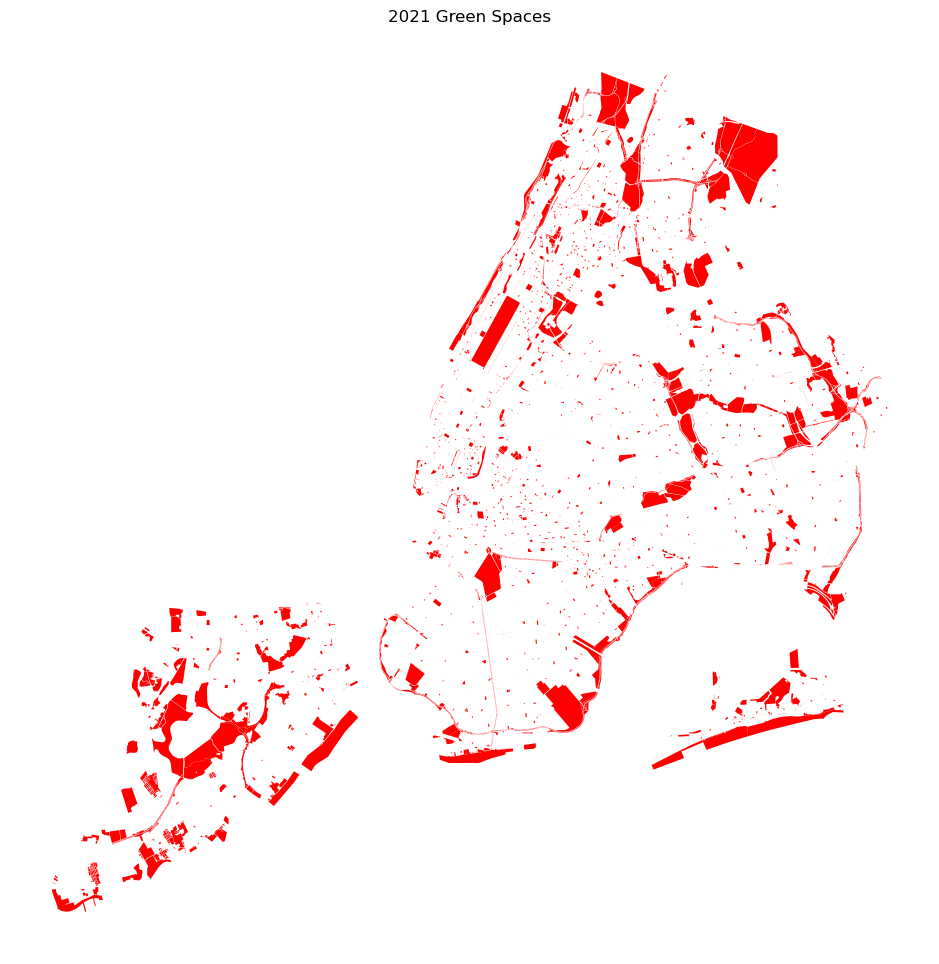

In [63]:
new_gf.plot( color='red',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('2021 Green Spaces')
plt.show()

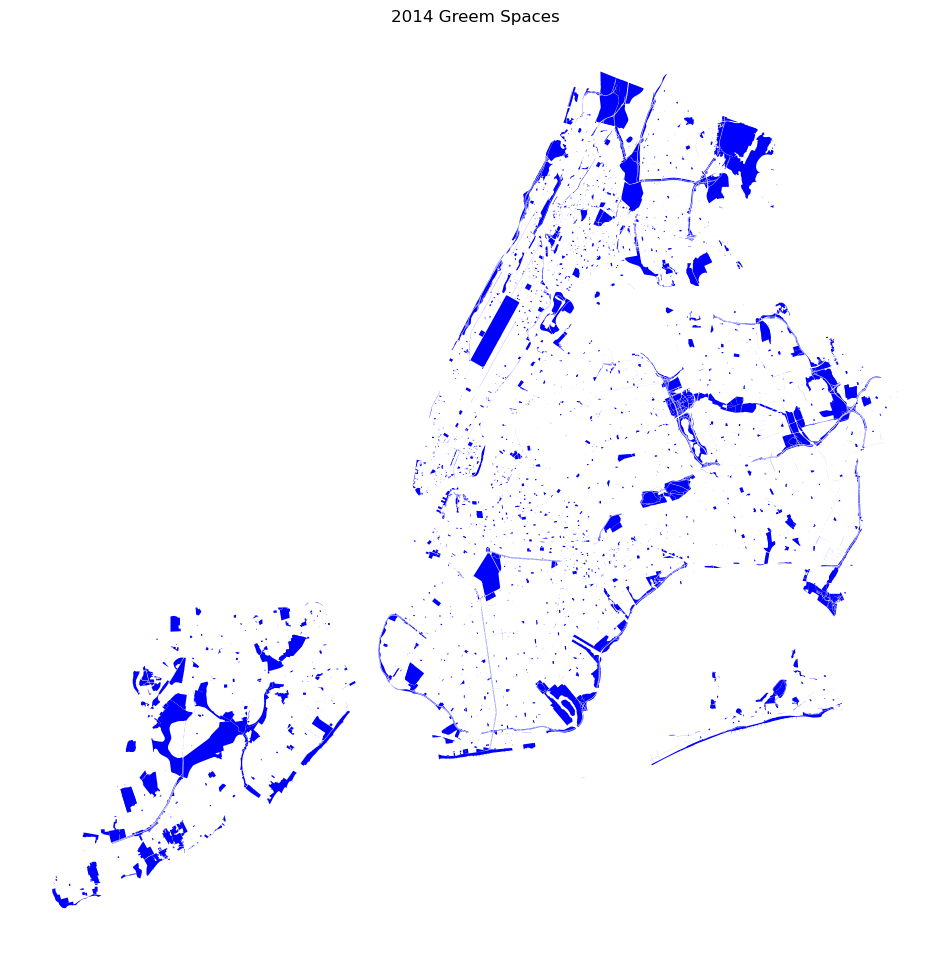

In [64]:
old_gf.plot( color='blue',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('2014 Greem Spaces')
plt.show()


In [65]:
plot_difference = gpd.overlay(new_gf, old_gf, how="difference")

<AxesSubplot: >

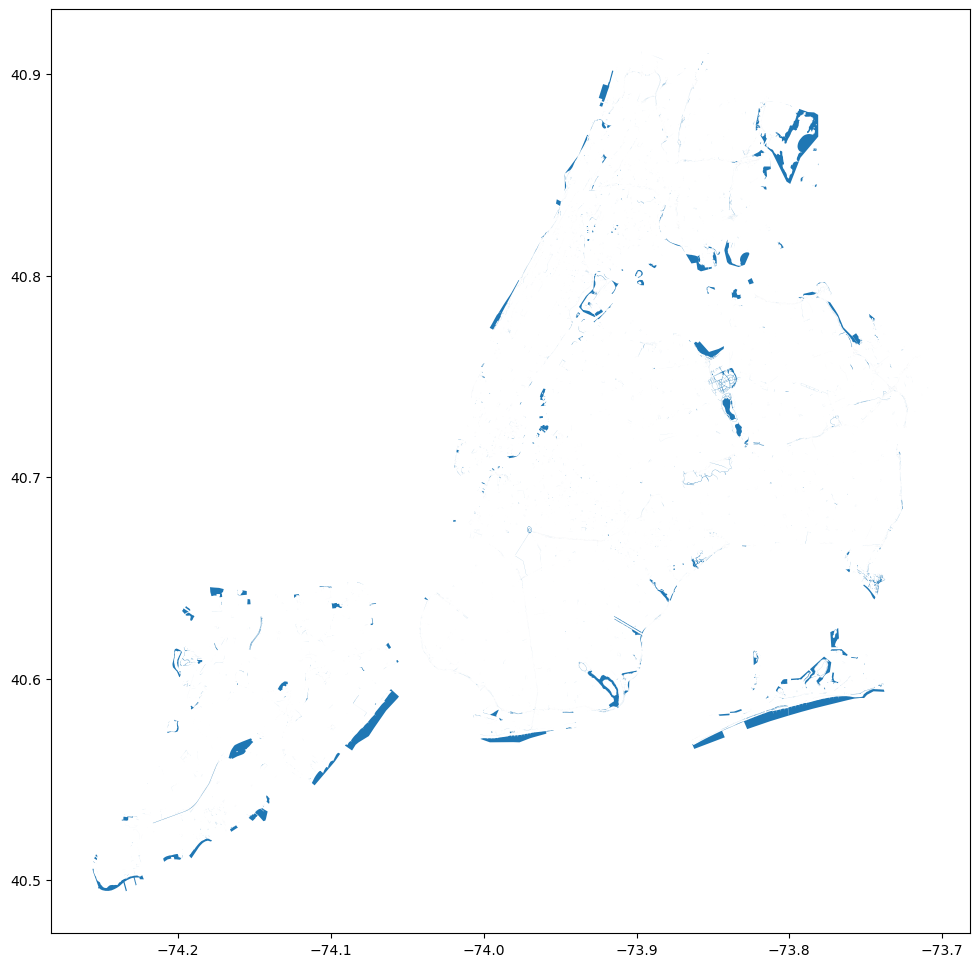

In [66]:
plot_difference.plot(figsize=(12, 12),markersize=0.3)